# Lab 3
### Averaging Filters

http://scikit-image.org/docs/0.13.x/api/skimage.util.html#skimage.util.random_noise

http://scikit-image.org/docs/dev/api/skimage.filters.html#skimage.filters.median

http://scikit-image.org/docs/dev/api/skimage.filters.html#skimage.filters.gaussian

In [1]:
from commonfunctions import *
import math
import numpy
from skimage.color import rgb2gray
from skimage.filters import median
from skimage.filters import gaussian
%matplotlib inline
%load_ext autoreload
%autoreload 2

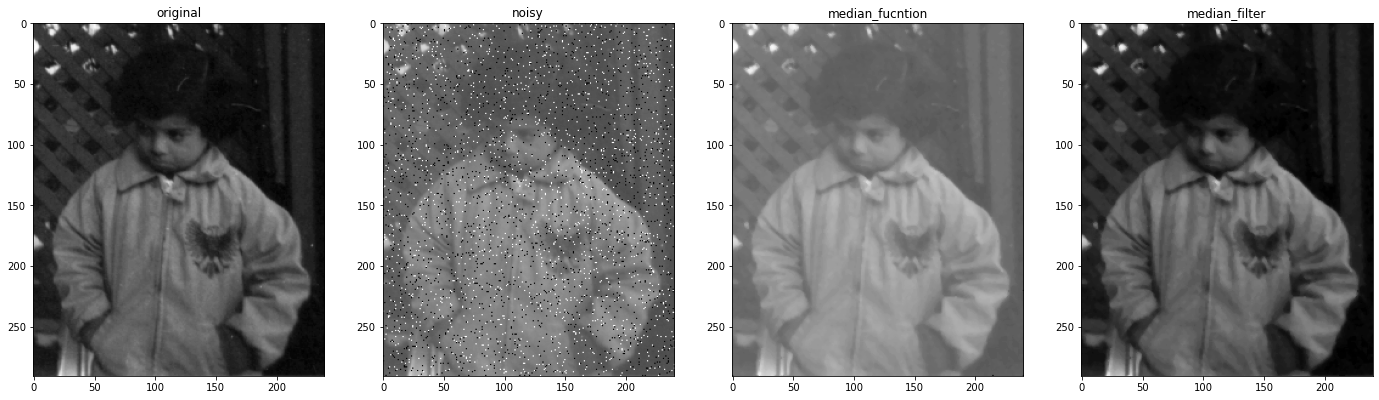

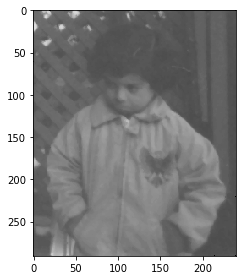

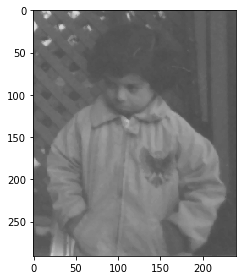

In [2]:
'''
(1) Your own median filter algorithm
'''

def median_filter(img):
    twod=np.pad(img,1)#to pad the input mode='edge'
    sizey=twod.shape[0] #get x size
    sizex=twod.shape[1] #get y size
    oneDimage=(twod).flatten()  #2d array to 1d array
    result=np.zeros(img.shape[0]*img.shape[1]) #intialize the result
    resultIndex=0
    for i in range(len(oneDimage)):
        if ((i % sizex == 0)or((i+1)%sizex==0)or(int(i/sizex)==0)):
            continue
        elif (int(i/sizex)==(sizey-1)): #last row
            break
        else:
            filter = oneDimage[(i-1-sizex):(i-1-sizex+3)]
            filter= np.append(filter,oneDimage[(i-1):(i+2)])
            filter=np.append(filter,oneDimage[(i+1+sizex-2):(i+1+sizex+1)])
            result[resultIndex]= np.median(filter)
            resultIndex +=1
   
    return result.reshape(img.shape[0],img.shape[1])

# noisy=np.array([
#     [4,3,2],
#     [3,1,2],
#     [5,1,6],
#     [2,3,5]
# ])
# print(median_filter(noisy))

img=io.imread('pout.tif')

noisy=random_noise(img,mode='s&p',amount=0.05)


show_images([img,noisy,median_filter(noisy),median(noisy)],['original','noisy','median_fucntion','median_filter'])
io.imshow(median_filter(noisy))
io.show()

io.imshow(median(noisy))
io.show()

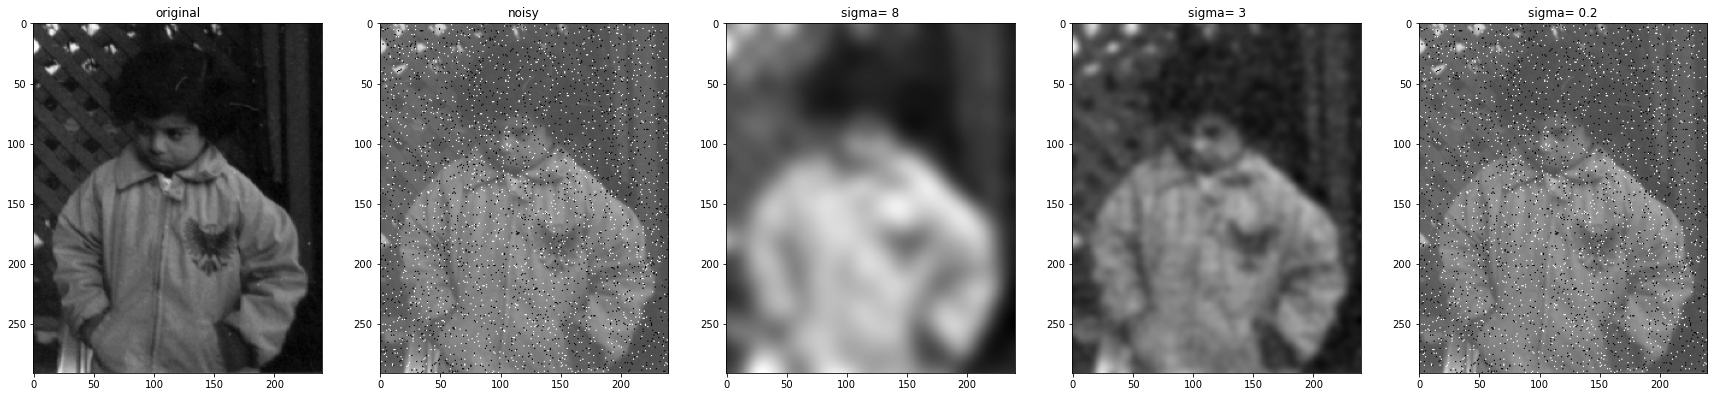

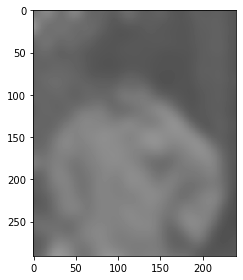

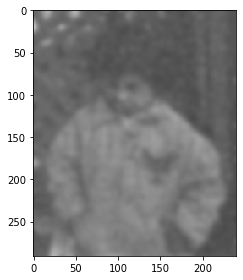

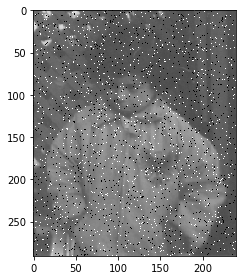

In [3]:
img=io.imread('pout.tif')
noisy=random_noise(img,mode='s&p',amount=0.05)

sigma8=gaussian(noisy,sigma=8)
sigma3=gaussian(noisy,sigma=3)
sigma02=gaussian(noisy,sigma=0.2)
show_images([img,noisy,sigma8,sigma3,sigma02],['original','noisy','sigma= 8','sigma= 3','sigma= 0.2'])

io.imshow(gaussian(noisy,sigma=8))
io.show()

io.imshow(gaussian(noisy,sigma=3))
io.show()

io.imshow(gaussian(noisy,sigma=0.2))
io.show()